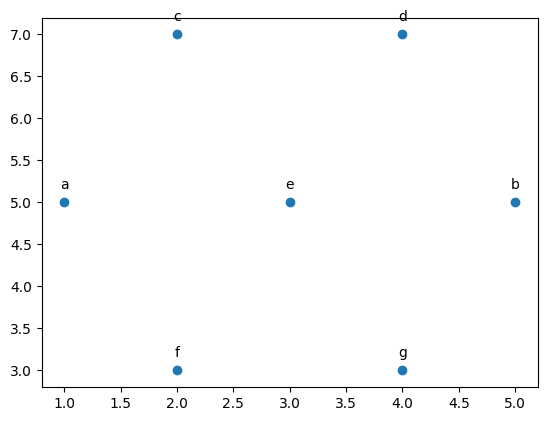

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

class Vertex:
    def __init__ (self, x_coord, y_coord, name):
        self.x_coord = x_coord
        self.y_coord = y_coord
        self.name = name
        self.edges = []
        self.estimates = float('inf')
        self.visited = False
        self.previous = None
    def set_edges (self, next_vertex, weight):
        edge = {
            'next_vertex': next_vertex,
            'weight': weight
        }
        self.edges.append(edge)
    def set_estimates (self, estimates):
        self.estimates = estimates
    def set_visited (self, visited):
        self.visited = visited

def calculate_euclidean_distance (vertex1, vertex2):
    return ((vertex2.x_coord - vertex1.x_coord)**2 + (vertex2.y_coord - vertex1.y_coord)**2)**0.5

cache = {}

a = Vertex(1, 5, 'a')
b = Vertex(5, 5, 'b')
c = Vertex(2, 7, 'c')
d = Vertex(4, 7, 'd')
e = Vertex(3, 5, 'e')
f = Vertex(2, 3, 'f')
g = Vertex(4, 3, 'g')

x = [a.x_coord, b.x_coord, c.x_coord, d.x_coord, e.x_coord, f.x_coord, g.x_coord]
y = [a.y_coord, b.y_coord, c.y_coord, d.y_coord, e.y_coord, f.y_coord, g.y_coord]
labels = [a.name, b.name, c.name, d.name, e.name, f.name, g.name]
plt.scatter(x, y)

for i in range(len(x)):
    plt.annotate(labels[i], (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
    

In [16]:
a.set_edges(c, 3)
a.set_edges(f, 1)
c.set_edges(f, 2)
c.set_edges(e, 1)
c.set_edges(d, 4)
f.set_edges(e, 1)
f.set_edges(g, 5)
f.set_edges(c, 2)
f.set_edges(b, 6)
e.set_edges(b, 2)
d.set_edges(b, 1)
g.set_edges(g, 2)

In [14]:
def djikstra (start_vertex, end_vertex):
    start_vertex.set_estimates(0)
    start_vertex.set_visited(True)
    queue = [start_vertex]
    while len(queue) > 0:
        current_vertex = queue.pop(0)
        for edge in current_vertex.edges:
            next_vertex = edge['next_vertex']
            weight = edge['weight']
            ## check if the vertext has been visited 
            if next_vertex.visited == False:
                ## aim for the most minimal estimate at the same time constinuously adjusting its previous vertex pointer 
                if next_vertex.estimates > current_vertex.estimates + weight:
                    next_vertex.set_estimates(current_vertex.estimates + weight)
                    next_vertex.previous = current_vertex
                ## this ensures that all vertex will be visited (in the worst case scenario)
                ## Worst case scenario = if the length of nodes from each branches, which all connects to the vertex destination, is equal 
                ## ex.    A->B->C->D    A->F->G->D    A->H->I->D
                queue.append(next_vertex)
        current_vertex.set_visited(True)
    path = []
    current_vertex = end_vertex
    while current_vertex != None:
        path.append(current_vertex.name)
        current_vertex = current_vertex.previous
    path.reverse()
    return path

print(djikstra(a, b))

['a', 'f', 'e', 'b']
